# Preprocessing

Import python modules

In [1]:
import pandas as pd
import numpy as np
import pycombat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load gene expression and metadata

File paths:

In [ ]:
xena_expression_filepath = "data/raw/TcgaTargetGtex_rsem_gene_tpm.gz" 
xena_metadata_filepath = "data/raw/TcgaTargetGTEX_phenotype.txt.gz"
metadata_filepath = "data/processed/metadata_brain_only.csv"
expression_filepath = "data/processed/expression_brain_only.csv"


In [3]:
gene_expression_df = pd.read_csv(
    xena_expression_filepath, 
    sep='\t', 
    index_col=0,  # Assumes the first column is the gene/sample name
    compression='gzip' # if your file ends in .gz
)
print("Expression Shape:", gene_expression_df.shape)
display(gene_expression_df.head())

Expression Shape: (60498, 19131)


,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,TCGA-B5-A5OE-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-B2-5641-11,GTEX-ZPCL-0126-SM-4WWC8,TARGET-20-PANGDN-09,...,TCGA-FI-A2EY-01,TCGA-55-6985-11,TCGA-EJ-5527-01,TCGA-G3-A25X-01,TCGA-24-2254-01,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-3.4580,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-4.0350,-2.0529,-9.9658,-9.9658,-1.9379,1.5165,-9.9658,-2.3884,0.0440,-3.3076
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112.3,-3.6259,-3.8160,-3.0469,-2.1779,-9.9658,-9.9658,-1.8314,-2.4659,-9.9658,-9.9658,...,-3.1714,-4.2934,-9.9658,-9.9658,-5.5735,-2.9324,-9.9658,-9.9658,2.5852,-3.0469
ENSG00000167578.16,4.5988,5.2998,4.8881,4.6294,3.5572,5.0858,6.4989,4.6317,5.5358,4.1376,...,4.7253,5.4206,4.4771,5.2627,5.0760,6.0809,4.7410,5.3212,5.8110,5.9132
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [5]:
metadata_df = pd.read_csv(
    xena_metadata_filepath, 
    sep='\t',
    encoding='latin-1'
)

print("\nMetadata Shape:", metadata_df.shape)
display(metadata_df.head())


Metadata Shape: (19131, 7)


,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA


## Gene map script
Script for mapping Ensembl IDs (e.g. ENSG00000138435) to Gene Symbol (e.g. IDH1)

In [23]:
in_xena_gene_map_filepath = "data/raw/probeMap_gencode.v23.annotation.gene.probemap"
mapper_df = pd.read_csv(
    in_xena_gene_map_filepath, 
    sep='\t',
    # encoding='latin-1'
)
# print("duplicated:"+mapper_df.duplicated)
ensembl_to_gene_map = mapper_df.set_index('id')['gene'].to_dict()

# gene_expression_df
# ensembl_to_gene_map
gene_expression_mapped_df = gene_expression_df.copy()
gene_expression_mapped_df['gene_symbol'] = gene_expression_mapped_df.index.map(ensembl_to_gene_map)
gene_expression_mapped_df = gene_expression_mapped_df.dropna(subset=['gene_symbol'])
gene_expression_mapped_df

,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,TCGA-B5-A5OE-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-B2-5641-11,GTEX-ZPCL-0126-SM-4WWC8,TARGET-20-PANGDN-09,...,TCGA-55-6985-11,TCGA-EJ-5527-01,TCGA-G3-A25X-01,TCGA-24-2254-01,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN,gene_symbol
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-3.4580,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-2.0529,-9.9658,-9.9658,-1.9379,1.5165,-9.9658,-2.3884,0.0440,-3.3076,RP11-368I23.2
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,RP11-167B3.1
ENSG00000270112.3,-3.6259,-3.8160,-3.0469,-2.1779,-9.9658,-9.9658,-1.8314,-2.4659,-9.9658,-9.9658,...,-4.2934,-9.9658,-9.9658,-5.5735,-2.9324,-9.9658,-9.9658,2.5852,-3.0469,RP11-742D12.2
ENSG00000167578.16,4.5988,5.2998,4.8881,4.6294,3.5572,5.0858,6.4989,4.6317,5.5358,4.1376,...,5.4206,4.4771,5.2627,5.0760,6.0809,4.7410,5.3212,5.8110,5.9132,RAB4B
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,AC104071.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273233.1,-3.3076,-1.2481,-1.2142,-9.9658,-9.9658,-2.4659,-1.8314,-9.9658,-1.3548,-4.6082,...,-9.9658,-3.6259,-3.8160,-1.8836,-9.9658,-9.9658,-9.9658,-0.8863,-2.1779,RP11-713D19.1
ENSG00000105063.18,5.8102,5.2661,4.8151,4.9905,3.4358,4.5473,4.8182,5.1256,5.2980,4.8445,...,4.7603,4.6955,4.1178,6.2593,5.2758,5.0505,4.5021,5.2843,5.8963,PPP6R1
ENSG00000231119.2,-3.8160,-0.2159,-3.3076,-9.9658,-2.5479,0.6880,-1.3921,-1.2481,-0.8339,-5.5735,...,0.1776,-1.5105,-1.0262,-0.5543,-0.9132,-5.0116,-0.6416,-2.5479,-2.1779,RP4-569M23.2


In [21]:
print(mapper_df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
60493    False
60494    False
60495    False
60496    False
60497    False
Length: 60498, dtype: bool


In [ ]:
import pandas as pd
import os
import glob

# --- 1. SET THIS PATH ---
# Point this to the folder where you unzipped your TCGA download
a_tcga_download_dir = "data/raw/gdc/"
# ------------------------

# Define the output filename
map_filepath = "data/processed/gene_map.csv"

print("Starting gene map creation...")

try:
    # --- 2. Find One Raw TCGA File ---
    search_pattern = os.path.join(a_tcga_download_dir, '*', '*star*gene_counts.tsv')
    a_tcga_all_files = glob.glob(search_pattern)
    
    if not a_tcga_all_files:
        raise FileNotFoundError(f"No '*star*gene_counts.tsv' files found in {a_tcga_download_dir}")

    # Get the path to the very first file
    one_tcga_file_path = a_tcga_all_files[0]
    print(f"Reading file: {one_tcga_file_path}")

    # --- 3. Load the File ---
    temp_df = pd.read_csv(
        one_tcga_file_path,
        sep='\t',
        comment='#',
        header=0
    )
    
    # Keep only the two columns we need
    temp_df = temp_df[['gene_id', 'gene_name']]
    
    # Clean the Ensembl ID (e.g., "ENSG...15" -> "ENSG...")
    temp_df['gene_id_clean'] = temp_df['gene_id'].str.split('.').str[0]
    
    # Create the final map (Symbol and Cleaned ID)
    final_map_df = temp_df[['gene_name', 'gene_id_clean']]
    
    # Drop any duplicates (some symbols might be repeated)
    final_map_df = final_map_df.drop_duplicates(subset=['gene_name'])

    # --- 5. Save the Map to a File ---
    final_map_df.to_csv(map_filepath, index=False)
    
    print("\n--- SUCCESS ---")
    print(f"Gene map with {len(final_map_df)} genes was successfully saved to: {map_filepath}")

except Exception as e:
    print("\n--- ERROR ---")
    print(f"An error occurred: {e}")
    print("Please ensure 'a_tcga_download_dir' is set to the correct folder path.")

Starting gene map creation...
Reading file: data/raw/gdc\00426c02-8fec-4862-92e6-876a81533b9e\54c6eff1-866a-4b26-9778-6b085fc25123.rna_seq.augmented_star_gene_counts.tsv

--- SUCCESS ---
Gene map with 59428 genes was successfully saved to: data/processed/gene_map.csv


In [9]:
print(f"Original shape of data_B: {gene_expression_df.shape}")

genes_duplicated = gene_expression_df.index.duplicated().sum()
print(f"Duplicate genes (rows) found: {genes_duplicated}")

if genes_duplicated > 0:
    print("Removing duplicate genes...")
    expression_df = gene_expression_df.drop_duplicates()
    print(f"New genes shape after dropping duplicate samples: {expression_df.shape}")
else:
    expression_df = gene_expression_df

metadata_duplicated = metadata_df.T.duplicated().sum()
print(f"Duplicate metadata (columns) found: {metadata_duplicated}")

if metadata_duplicated > 0:
    print("Removing duplicate metadata...")
    metadata_df = metadata_df.drop_duplicates()
    print(f"New metadata shape after dropping duplicate samples: {expression_df.shape}")
else:
    metadata_df = metadata_df


# --- Check for NA (Missing) Values ---
# data_B.isna().any() checks each column for NAs.
# .any() again checks if *any* column returned True.
na_values_found = expression_df.isna().any().any()
print(f"NA (missing) gene values found: {na_values_found}")

if na_values_found:
    # An NA value will break the model. The best strategy
    # is to remove the entire gene (row) that contains an NA.
    original_gene_count = expression_df.shape[0]
    
    # .dropna(axis=0) drops any ROW (gene) containing an NA.
    expression_df = expression_df.dropna(axis=0) 
    
    genes_removed = original_gene_count - expression_df.shape[0]
    print(f"Removed {genes_removed} genes that contained NA values.")
    print(f"New shape after dropping NA genes: {expression_df.shape}")

na_values_found = metadata_df.isna().any().any()
print(f"NA (missing) metadata values found: {na_values_found}")

if na_values_found:
    # An NA value will break the model. The best strategy
    # is to remove the entire gene (row) that contains an NA.
    original_gene_count = metadata_df.shape[0]
    
    # .dropna(axis=0) drops any ROW (gene) containing an NA.
    metadata_df = metadata_df.dropna(axis=0) 
    
    genes_removed = original_gene_count - metadata_df.shape[0]
    print(f"Removed {genes_removed} metadata that contained NA values.")
    print(f"New shape after dropping NA metadata: {metadata_df.shape}")

# --- Final Verification ---
print("\n--- Cleaning Complete ---")
print(f"Final gene expression shape: {expression_df.shape}")
print(f"Final metadata shape: {metadata_df.shape}")

Original shape of data_B: (60498, 19131)
Duplicate genes (rows) found: 0
Duplicate metadata (columns) found: 1
Removing duplicate metadata...
New metadata shape after dropping duplicate samples: (60498, 19131)
NA (missing) gene values found: False
NA (missing) metadata values found: True
Removed 163 metadata that contained NA values.
New shape after dropping NA metadata: (18968, 7)

--- Cleaning Complete ---
Final gene expression shape: (60498, 19131)
Final metadata shape: (18968, 7)


## Distribution primary site / cancer types

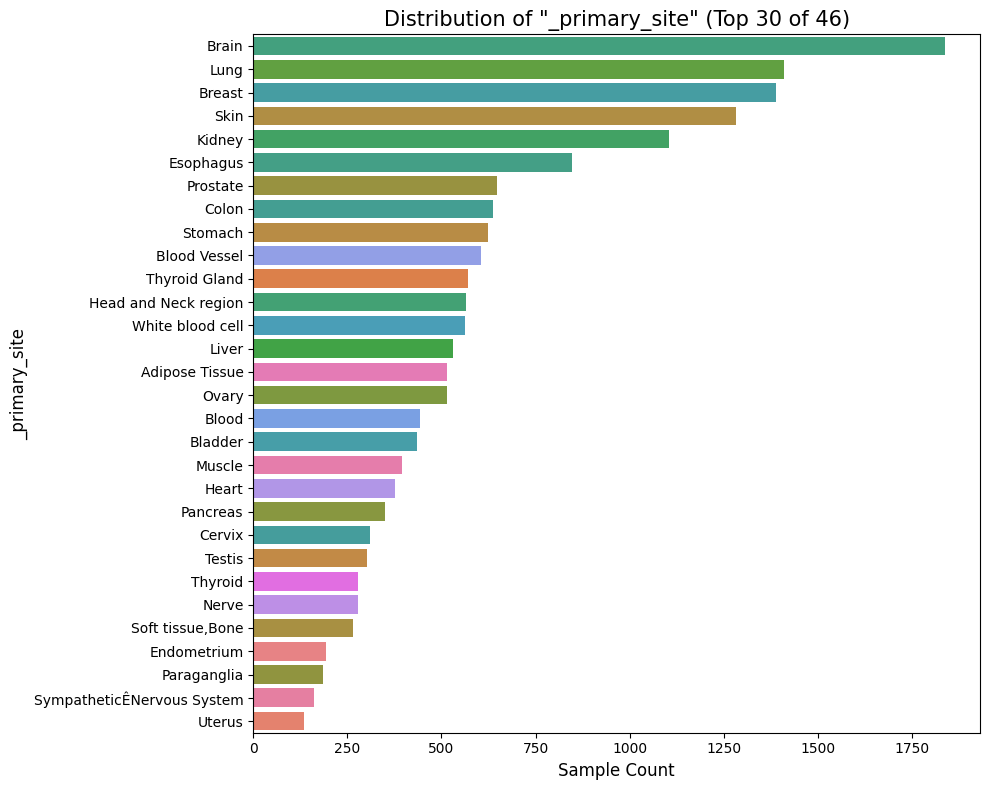

In [10]:
col = '_primary_site'
plt.figure(figsize=(10, 8))

top_n = 30
num_categories = metadata_df[col].nunique()

if num_categories > top_n:
    plot_title = f'Distribution of "{col}" (Top {top_n} of {num_categories})'
    top_categories = metadata_df[col].value_counts().nlargest(top_n).index
else:
    plot_title = f'Distribution of "{col}" (All {num_categories})'
    top_categories = metadata_df[col].value_counts().index

sns.countplot(
    y=col, 
    data=metadata_df, 
    order=top_categories,
    hue=col,
    legend=False
)

plt.title(plot_title, fontsize=15)
plt.xlabel('Sample Count', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show() # Display the plot

In [11]:
# We use .str.startswith('Brain') to get 'Brain' (TCGA) AND 'Brain - ...' (GTEx)
filter_condition = metadata_df['_primary_site'].str.startswith('Brain', na=False)
metadata_brain_df = metadata_df[filter_condition]

# --- Verification ---
print(f"Original shape: {metadata_df.shape}")
print(f"Filtered (Brain only) shape: {metadata_brain_df.shape}")

original_studies = set(metadata_df['_study'])
filtered_studies = set(metadata_brain_df['_study'])

print(f"\nOriginal studies: {original_studies}")
print(f"Filtered studies: {filtered_studies}")

if 'TARGET' in original_studies and 'TARGET' not in filtered_studies:
    print("Observation confirmed: 'TARGET' samples were successfully filtered out.")

Original shape: (18968, 7)
Filtered (Brain only) shape: (1839, 7)

Original studies: {'TARGET', 'GTEX', 'TCGA'}
Filtered studies: {'GTEX', 'TCGA'}
Observation confirmed: 'TARGET' samples were successfully filtered out.


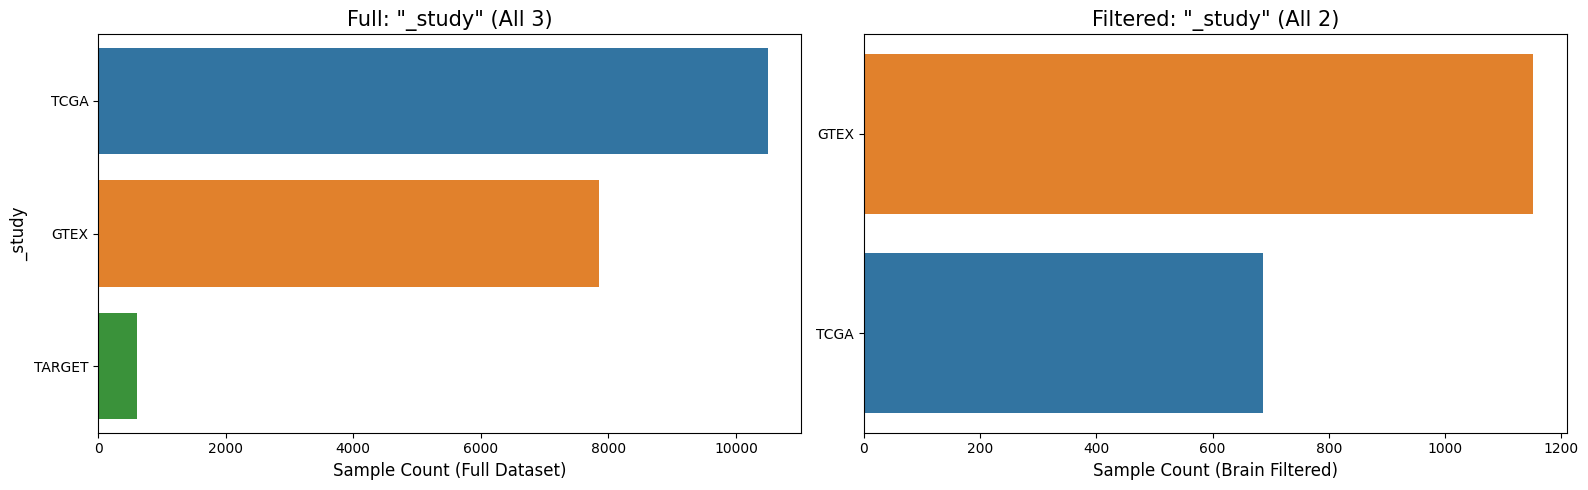

In [12]:
col = '_study'
# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

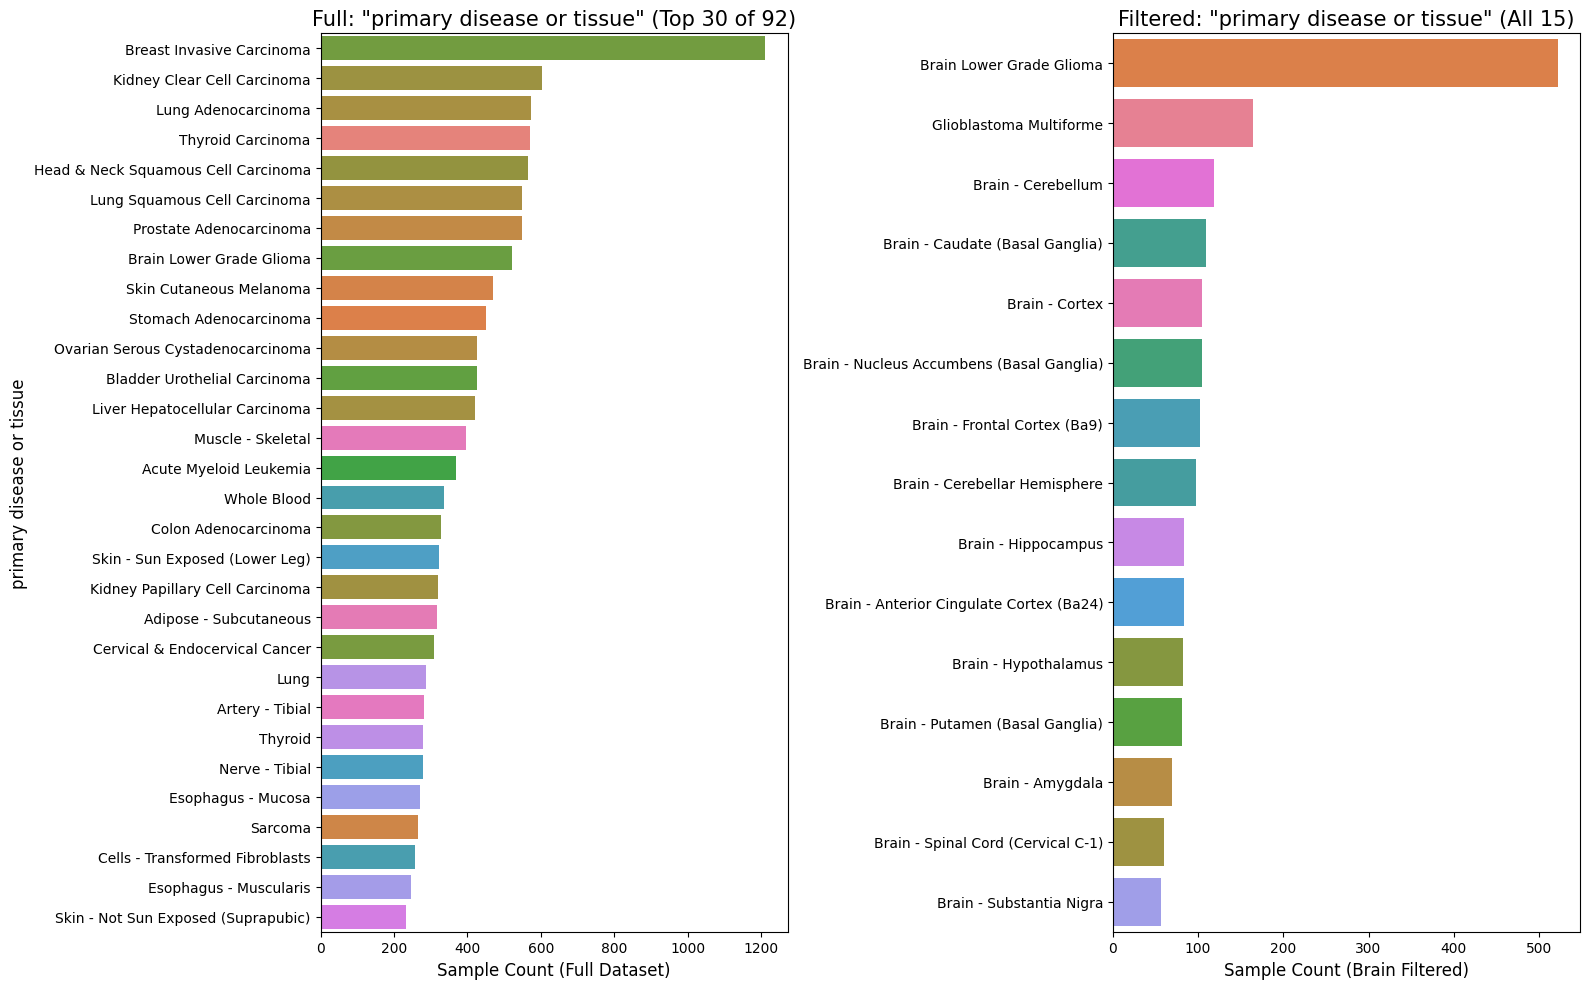

In [13]:
col = 'primary disease or tissue'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

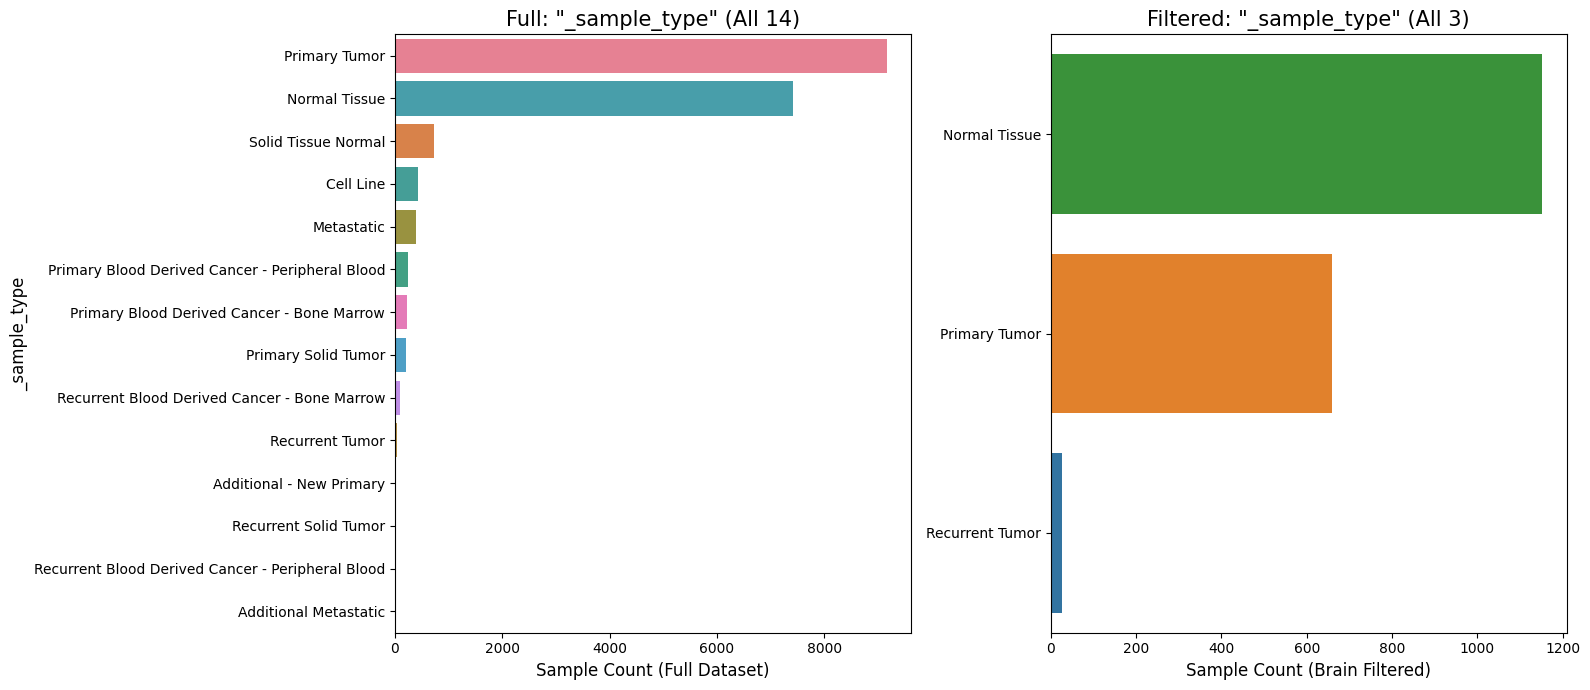

In [14]:
col = '_sample_type'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

In [ ]:
b_samples_to_keep = metadata_brain_df['sample'].tolist()

print(f"Total samples to keep for analysis: {len(b_samples_to_keep)}")

filtered_genes = gene_expression_df[
    gene_expression_df.columns.intersection(b_samples_to_keep)
].copy()

print(f"Filtered expression matrix shape: {filtered_genes.shape}")

print("\n--- Pipeline Complete ---")
print(f"Final `gene` matrix shape: {filtered_genes.shape}")
display(filtered_genes.head())

Total samples to keep for analysis: 1839
Filtered expression matrix shape: (60498, 1839)

--- Pipeline Complete ---
Final `gene` matrix shape: (60498, 1839)


,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,GTEX-N7MS-2526-SM-26GMA,GTEX-N7MS-2526-SM-26GMR,GTEX-NPJ7-0011-R6a-SM-2I3G7,...,TCGA-06-0745-01,GTEX-13G51-0011-R6b-SM-5LZX4,TCGA-TM-A84B-01,GTEX-YFC4-0011-R10a-SM-4SOK5,TCGA-DU-A76O-01,GTEX-13112-0011-R4b-SM-5DUXL,GTEX-1313W-0011-R1b-SM-5EQ4A,TCGA-CS-4944-01,TCGA-HT-7603-01,GTEX-Q2AG-2826-SM-2HMJQ
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-9.9658,0.2998,-9.9658,-0.4521,-4.2934,-2.5479,-0.6193,-0.5756,-2.8262,-0.5973,...,-1.2481,-1.0262,1.1117,-0.6416,-9.9658,-2.5479,-1.5522,-9.9658,-9.9658,0.0440
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112.3,-3.8160,-3.0469,-1.8314,-0.7346,0.1519,0.9115,-2.6349,3.7204,1.7489,-0.8084,...,1.2147,-0.8599,1.8242,1.2576,-6.5064,-1.0862,0.6880,-4.2934,1.0642,2.5852
ENSG00000167578.16,5.2998,4.8881,6.4989,5.7632,6.1687,5.6329,5.8709,6.0086,2.1894,5.4350,...,6.0330,5.6789,4.6809,6.5322,6.2263,5.5100,6.1258,6.6567,6.8560,5.8110
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


## Store data for ease of use 

In [14]:
metadata_brain_copy = metadata_brain_df.set_index('sample').copy()

metadata_brain_copy.to_csv(metadata_filepath, index_label='sample_id')
print(f"Labels saved to: {metadata_filepath}")

Labels saved to: data/processed/metadata_brain_only_no_clean_gene.csv


In [15]:
# We add index_label='sample_id' to name the first column
filtered_genes.to_csv(expression_filepath, index_label='sample_id')
print(f"Scaled data saved to: {expression_filepath}")

Scaled data saved to: data/processed/expression_brain_only_no_clean_gene.csv
